In [2]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Lambda
from tensorflow.keras.optimizers import RMSprop
from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import timeit
import cv2

In [15]:
base = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
# 所有層解凍
#base.trainable = True
# 查看層數
print('numbers of layers:', len(base.layers))
# numbers of layers: 154
 
# 指定凍結的層數
#find_tune_at = 23
# 將指定層之前的層凍結
#for layer in base.layers[:find_tune_at]:
#    layer.trainable = False

for layer in base.layers:
    layer.trainable = False
    
x=base.output
x=layers.GlobalAveragePooling2D()(x)
# 加入全連接層
x = layers.Dense(128, activation='relu')(x)
#x = layers.Dropout(0.5)(x)
# 輸出層
x = layers.Dense(3, activation='softmax')(x)
 
# 给出輸入和輸出，建立模型
model = Model(base.input, x) # 给出輸入和輸出，建立模型
 
# 查看模型架構
base.summary()

model.compile(optimizer = Adam(learning_rate=1e-4), #指定學習率
            loss = 'categorical_crossentropy',
            metrics = ['acc']
            )

numbers of layers: 154
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                       

In [16]:
import os
img_folder=r"./train/"
def create_dataset(img_folder): 
   
    img_data_array=[] 
    class_name=[] 
   
    for dir1 in os.listdir(img_folder): 
        for file in os.listdir(os.path.join(img_folder, dir1)): 
            image_path= os.path.join (img_folder, dir1, file)
            image= cv2.imread( image_path)
            if image is None:
                print(os.path.join("image", file))
            image=cv2.resize(image, (224, 224),interpolation = cv2.INTER_AREA) 
            image = image[:,:,::-1]
            image=np.array(image) 
            image = image .astype('float32')
            image /= 255
            img_data_array.append(image) 
            class_name.append(dir1) 
    return img_data_array, class_name

# 提取圖像數組和類名
img_data_array, class_name =create_dataset(r"./train/")

In [17]:
import os
img_folder=r"./test/"
def create_dataset(img_folder): 
   
    img_data_array=[] 
    class_name=[] 
   
    for dir1 in os.listdir(img_folder): 
        for file in os.listdir(os.path.join(img_folder, dir1)): 
            image_path= os.path.join (img_folder, dir1, file)
            image= cv2.imread(image_path)
            if image is None:
                print(os.path.join("image", file))
            image=cv2.resize(image, (224, 224),interpolation = cv2.INTER_AREA)
            image = image[:,:,::-1]
            #print(image.shape)
            image=np.array(image) 
            image = image .astype('float32') 
            image /= 255
            img_data_array.append(image) 
            class_name.append(dir1) 
    return img_data_array, class_name

# 提取圖像數組和類名
img_data_array2, class_name2 =create_dataset(r"./test/")

In [18]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))} 
target_val= [target_dict[class_name[i]] for i in range(len(class_name))]
target_dict2={k: v for v, k in enumerate(np.unique(class_name2))} 
target_val2 = [target_dict2[class_name2[i]] for i in range(len(class_name2))]

In [19]:
print(target_dict)

{'incorrect_mask': 0, 'no_mask': 1, 'with_mask': 2}


In [20]:
y_train = np.array(target_val)
x_train = np.array(img_data_array)

x_test = np.array(img_data_array2)
y_test = np.array(target_val2)

In [21]:
y_train = to_categorical(y_train,3)
y_test = to_categorical(y_test, 3)

In [22]:
print(x_test.shape)

(4578, 224, 224, 3)


In [23]:
history = model.fit(
    x_train,y_train,
    validation_data = (x_test,y_test),
    epochs = 10,
    batch_size = 32
)

Epoch 1/10
302/302 [==============================] - 119s 391ms/step - loss: 0.2132 - acc: 0.9281 - val_loss: 0.0922 - val_acc: 0.9705
Epoch 2/10
302/302 [==============================] - 116s 386ms/step - loss: 0.0480 - acc: 0.9878 - val_loss: 0.0691 - val_acc: 0.9764
Epoch 3/10
302/302 [==============================] - 109s 361ms/step - loss: 0.0308 - acc: 0.9917 - val_loss: 0.0551 - val_acc: 0.9817
Epoch 4/10
302/302 [==============================] - 112s 372ms/step - loss: 0.0229 - acc: 0.9944 - val_loss: 0.0656 - val_acc: 0.9784
Epoch 5/10
302/302 [==============================] - 115s 381ms/step - loss: 0.0171 - acc: 0.9960 - val_loss: 0.0568 - val_acc: 0.9808
Epoch 6/10
302/302 [==============================] - 114s 379ms/step - loss: 0.0139 - acc: 0.9968 - val_loss: 0.0560 - val_acc: 0.9819
Epoch 7/10
302/302 [==============================] - 114s 377ms/step - loss: 0.0112 - acc: 0.9980 - val_loss: 0.0562 - val_acc: 0.9819
Epoch 8/10
302/302 [============================

In [12]:
#y_pred_train = model.predict(x_train)
train_accuracy = model.evaluate(x_train,y_train)

#y_pred_test = model.predict(x_test)
test_accuracy = model.evaluate(x_test,y_test)


144/144 [==============================] - 38s 261ms/step - loss: 0.0713 - acc: 0.9854


In [75]:
print(f"Loss = {format(test_accuracy[0],'.2f')}, Train Accuracy = {format(train_accuracy[1]*100,'.2f')} %, Test Accuracy = {format(test_accuracy[1]*100,'.2f')} %")

Loss = 0.04, Train Accuracy = 99.98 %, Test Accuracy = 98.71 %


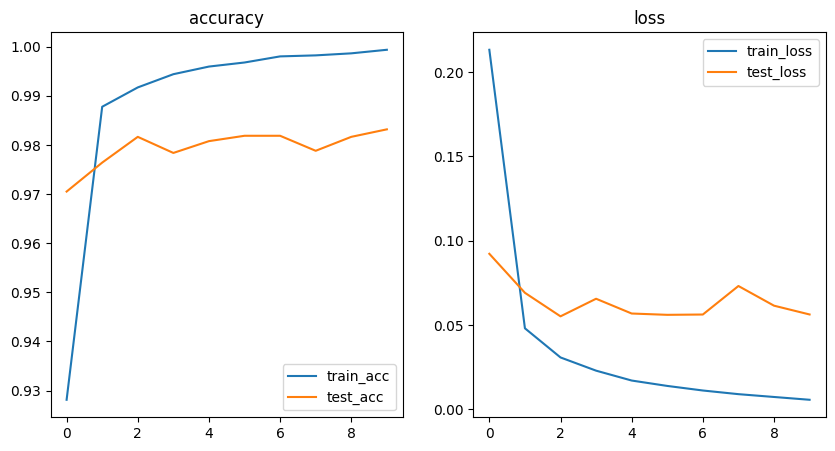

In [24]:
# 模型評估
# 準確率
train_acc = history.history['acc']
test_acc = history.history['val_acc']
# 損失
train_loss = history.history['loss']
test_loss = history.history['val_loss']
 
# 繪製準確率和損失曲線
# 準確率曲線
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='train_acc')
plt.plot(test_acc, label='test_acc')
plt.title('accuracy')
plt.legend()
# 損失曲線
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='train_loss')
plt.plot(test_loss, label='test_loss')
plt.title('loss')
plt.legend()
plt.show()

In [25]:
model.save('./model_mobileNetv2_2.h5')

In [26]:
def save_model(model, save_name="mymodel"):
    """
    model : Keras Model class
    save_name : str
    """
    # 儲存模型-tf格式
    # Convert the model.
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()
    # Save the model.
    with open("./" + save_name + ".tflite", 'wb') as f:
        f.write(tflite_model)

    # 儲存模型-keras格式
    #model.save("./" + save_name + ".h5")
save_model(model,save_name='model_mobileNetv2_lite')

INFO:tensorflow:Assets written to: C:\Users\M11115~1\AppData\Local\Temp\tmpw3au96zt\assets


INFO:tensorflow:Assets written to: C:\Users\M11115~1\AppData\Local\Temp\tmpw3au96zt\assets
